# 7장 케라스 모델 고급 활용법

**감사말**

프랑소와 숄레의 [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) 7장에 사용된 코드에 대한 설명을 담고 있으며 텐서플로우 2.6 버전 이상에서 작성되었습니다. 소스코드를 공개한 저자에게 감사드립니다.

**구글 코랩 설정**

'런타임 -> 런타임 유형 변경' 메뉴에서 GPU를 지정한다.
TensorFlow 버전을 확인하려면 아래 명령문을 실행한다.

In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

TensorFlow가 GPU를 사용하는지 여부를 확인하려면 아래 명령문을 실행한다.
아래와 같은 결과가 나오면 GPU가 제대로 지원됨을 의미한다.

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**참고**

아래 코드에 대한 자세한 설명은
[머신러닝 모델 고급 활용법](https://codingalzi.github.io/dlp2/working_with_keras.html)를 
참고한다.

## 7.1 케라스 활용

## 7.2 케라스 모델 구성법

### 7.2.1. 모델 구성법 1: `Sequential` 모델

**`Sequential` 클래스**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

층의 추가는 `add` 메서드를 이용할 수도 있다.
아래 코드는 앞서 정의한 모델과 동일한 모델을 구성한다.

In [4]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**모델의 가중치와 `build()` 메서드**

입력값 대신 `build()` 메서드를 특성 수 정보를 이용하여 직접 호출하면
가중치 텐서가 무작위로 초기화된 형식으로 생성된다.
즉, **모델 빌드**가 완성된다.

- `input_shape` 키워드 인자: `(None, 특성수)`
- `None`은 임의의 크기의 배치도 다룰 수 있다는 것을 의미함.

In [5]:
model.build(input_shape=(None, 3))

**층별 가중치 텐서**

모델 빌드가 완성되면 `weights` 속성에 생성된 모델 훈련에 필요한 모든 가중치와 편향이 저장된다.
위 모델에 대해서 층별로 가중치와 편향 텐서 하나씩 총 4 개의 텐서가 생성된다.

In [6]:
len(model.weights)

4

In [7]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.01305223,  0.20250821, -0.237908  , -0.02574873, -0.26955786,
          0.04522336, -0.05171975, -0.08204277,  0.14872321, -0.17852062,
          0.25629282, -0.12422022, -0.06252867,  0.06813109,  0.22049868,
         -0.0535862 , -0.18964818, -0.12878703, -0.23303461,  0.00643247,
          0.20961899,  0.05660641, -0.2564634 ,  0.07248384, -0.11544207,
         -0.28283063,  0.08631313, -0.22706962,  0.28438437,  0.26596075,
         -0.0575233 , -0.1254394 , -0.25638685, -0.05582987,  0.2747426 ,
         -0.13748407, -0.18444788, -0.19648412,  0.11662707,  0.11232647,
          0.00263494,  0.0863705 ,  0.05948955, -0.27429277,  0.01340383,
         -0.25403687,  0.14156735,  0.15759248,  0.02716681,  0.2302025 ,
          0.13777944, -0.046096  , -0.25796506, -0.05273716,  0.09991029,
          0.2025336 , -0.08021663,  0.06179893,  0.0086028 , -0.2780624 ,
          0.18655497, -0.20985441,  0.15226

- 1층의 가중치와 편향 텐서

In [8]:
model.weights[0].shape

TensorShape([3, 64])

In [9]:
model.weights[1].shape

TensorShape([64])

- 2층의 가중치와 편향 텐서

In [10]:
model.weights[2].shape

TensorShape([64, 10])

In [11]:
model.weights[3].shape

TensorShape([10])

**`summary()` 메서드**

완성된 모델의 요악한 내용은 확인할 수 있다.

- 모델과 층의 이름
- 층별 파라미터 수
- 파라미터 수

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**`name` 인자**

모델 또는 층을 지정할 때 생성자 메서등의 `name` 키워드 인자를 이용하여 이름을 지정할 수도 있다.

In [13]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))

model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**`Input()` 함수**

모델 구성 중간에 구성 과정을 확인하려면 `Input()`함수를 이용하여
**케라스텐서**(`KerasTensor`) 객체를
가장 먼저 모델에 추가한다.
그러면 층을 추가할 때마다 `summary()`를 실행할 수 있다.

In [14]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### 7.2.2. 모델 구성법 2: 함수형 API

**기본 활용법**

앞서 살펴 본 `Sequential` 모델을 함수형 API를 이용하여 구성하면 다음과 같다.

In [17]:
inputs = keras.Input(shape=(3,), name="my_input")          # 입력층
features = layers.Dense(64, activation="relu")(inputs)     # 은닉층
outputs = layers.Dense(10, activation="softmax")(features) # 출력층

model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**다중 입력, 다중 출력 모델**

예제: 고객 요구사항 접수 모델

고객의 요구사항의 처리할 때 필요한 우선순위와 담당부서를 지정하는 시스템을 구현하려 한다. 시스템에 사용될 딥러닝 모델은 세 개의 입력과 두 개의 출력을 사용한다.

In [19]:
vocabulary_size = 10000    # 요구사항에 사용되는 단어 총 수
num_tags = 100             # 태그 수
num_departments = 4        # 부서 수

# 입력층: 세 개
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# 은닉층
features = layers.Concatenate()([title, text_body, tags]) # shape=(None, 10000+10000+100)
features = layers.Dense(64, activation="relu")(features)

# 출력층: 두 개
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

# 모델 빌드
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

모델 훈련을 위해 적절한 개수의 입력 텐서와 타깃 텐서를 지정해야 한다.
여기서는 훈련 과정을 설명하기 위해 
적절한 모양의 입력 텐서 3개와 타깃 텐서 2개를 무작위로 생성해서 사용한다.

In [20]:
import numpy as np

# 샘플 수
num_samples = 1280

# 입력 텐서 3 개 무작위 생성
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))    # 멀티-핫-인코딩

# 타깃 텐서 2 개 무작위 생성
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))  # 멀티-핫-인코딩

모델 컴파일 과정에서 지정된 타깃 수만큼 손실함수와 측정 기준을 지정해야 한다.

In [21]:
model.compile(optimizer="adam",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

모델 훈련은 `fit()` 함수에 세 개의 훈련 텐서로 이루어진 리스트와 
두 개의 타깃 텐서로 이루어진 리스트를 지정한 후에 실행한다. 
여기서는 시험삼아 한 번의 에포크만 사용한다.

In [22]:
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

40/40 [==============================] - 3s 11ms/step - loss: 11.3375 - priority_loss: 0.2379 - department_loss: 11.0996 - priority_mean_absolute_error: 0.4073 - department_accuracy: 0.3453


모델 평가도 훈련과 동일한 방식의 인자가 사용된다.

In [23]:
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

40/40 [==============================] - 1s 7ms/step - loss: 3.4414 - priority_loss: 0.3322 - department_loss: 3.1092 - priority_mean_absolute_error: 0.5011 - department_accuracy: 0.3859


[3.441380739212036,
 0.33222872018814087,
 3.109152317047119,
 0.5011064410209656,
 0.38593751192092896]

예측값은 두 개의 어레이로 구성된 리스트이다.

In [24]:
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 5ms/step


In [25]:
priority_preds

array([[0.9793627 ],
       [0.9962972 ],
       [0.9902402 ],
       ...,
       [0.99423414],
       [0.99419665],
       [0.9919777 ]], dtype=float32)

In [26]:
department_preds

array([[0.2669355 , 0.06555925, 0.64991295, 0.01759234],
       [0.4556242 , 0.10985738, 0.22733322, 0.20718516],
       [0.30470237, 0.10842637, 0.5610666 , 0.02580466],
       ...,
       [0.36132422, 0.08186947, 0.48606652, 0.07073977],
       [0.24140638, 0.14201947, 0.5758787 , 0.04069547],
       [0.5205403 , 0.19161297, 0.20801933, 0.07982744]], dtype=float32)

**사전 객체 활용**

입력층과 출력층의 이름을 이용하여 사전 형식으로 입력값과 출력값을 지정할 수 있다.

In [27]:
model.compile(optimizer="adam",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 5ms/step


**층 연결 구조**

`plot_model()`을 이용하여 층 연결 구조를 그래프로 나타낼 수 있다.

```python
>>> keras.utils.plot_model(model, "ticket_classifier.png")
```

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ticket_classifier.png" style="width:400px;"></div>

입력 텐서와 출력 텐서의 모양을 함께 표기할 수도 있다.

```python
>>> keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)
```

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/ticket_classifier_with_shapes.png" style="width:900px;"></div>

**모델 재활용**

훈련된 모델의 특성을 이용하여 새로운 모델을 빌드할 수 있다.
먼저 모델의 `layers` 속성을 이용하여 사용된 층에 대한 정보를 확인한다. 
`layers` 속성은 사용된 층들의 객체로 이루어진 리스트를 가리킨다.

In [28]:
model.layers

예를 들어, 3번 인덱스에 해당하는 층의 입력값과 출력값에 대한 정보는 아래처럼 확인할 수 있다.

In [29]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [30]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

출력층을 제외한 나머지 층을 재활용해보자.
출력층은 5번과 6번 인덱스에 위치하기에 4번 인덱스가
가리키는 (은닉)층의 출력 정보를 따로 떼어낸다.

In [31]:
features = model.layers[4].output

이제 출력층에 문제해결의 어려움 정도를 "quick", "medium", "difficult"로
구분하는 어려움(difficulty) 정도를 판별하는 층을 추가해보자.
먼저, `difficulty` 층을 준비한다.

In [32]:
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

준비된 `'difficulty'` 층을 출력층으로 추가하여 
`priority`, `department`, `difficulty`
세 개의 출력값을 생성하는 새로운 모델을 구성한다.

In [33]:
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

새로 생성된 모델은 기존에 훈련된 모델의 가중치,
즉, 은닉층에 사용된 가중치는 그대로 사용되며,
모델 구성 그래프는 다음과 같다.

```python
>>> keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)
```

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/v-7/Figures/updated_ticket_classifier.png" style="width:900px;"></div>

요약 결과는 다음과 같다.

In [34]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

### 모델 구성법 3: 서브클래싱

앞서 함수형 API로 구성한 티켓 모델을 서브클래싱을 기법을 이용하여 구현하면 다음과 같다.

In [35]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):               # inputs: 사전 객체 입력값. 모양은 미정.
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])    # 은닉층
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)                 # 출력층
        department = self.department_classifier(features)
        return priority, department                               # outputs

모델 구성은 해당 모델의 객체를 생성하면 된다.
다만 `Layer`의 경우처럼 가중치는 실제 데이터와 함께 호출되지 전까지 생성되지 않는다.

In [36]:
model = CustomerTicketModel(num_departments=4)

model.weights

[]

컴파일, 훈련, 평가, 예측은 이전과 완전히 동일한 방식으로 실행된다.

In [37]:
model.compile(optimizer="adam",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 6ms/step


### 7.2.4. 혼합 모델 구성법

소개된 세 가지 방식을 임의로 혼합하여 활용할 수 있다. 

**예제: 서브클래싱 모델을 함수형 모델에 활용하기** (강추!!!)

In [38]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**예제: 함수형 모델을 서브클래싱 모델에 활용하기**

In [39]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

## 7.3 훈련 모니터링

케라스 모델의 구성, 훈련, 평가, 예측은 정해진 방식으로 차례대로 이루어진다.
아래 코드는 MNIST 데이터셋을 이용한 모델 훈련 전반 과정을 보여준다.

In [43]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2953 - accuracy: 0.9119 - val_loss: 0.1480 - val_accuracy: 0.9579
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1671 - accuracy: 0.9527 - val_loss: 0.1220 - val_accuracy: 0.9684
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1069 - accuracy: 0.9717


### 사용자 정의 평가지표(`metrics`) 활용

**`Metric` 클래스 상속**

아래 세 개의 메서드를 재정의(overriding)해야 한다.

- `update_state()`
- `result()`
- `reset_state()`

아래 코드는 평균제곱근오차(RMSE)를 평가지표로 사용하는 클래스를 
이용하는 모델 훈련을 소개한다.

In [44]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [45]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2935 - accuracy: 0.9141 - rmse: 7.1828 - val_loss: 0.1709 - val_accuracy: 0.9510 - val_rmse: 7.3536
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1676 - accuracy: 0.9530 - rmse: 7.3561 - val_loss: 0.1227 - val_accuracy: 0.9657 - val_rmse: 7.4048
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9711 - rmse: 7.4363


### 콜백(callback) 활용

**콜백**(callback)은 모델 훈련 도중에 부가적으로 호출되는 객체이며
학습 과정을 모니터링 하면서 일부 제어기능을 수행하는 다양한 메서드를 제공한다.
콜백이 활용되는 주요 기능은 다음과 같다.

- 모델 체크포인팅: 훈련 중 모델 상태 수시로 저장
- 훈련 조기 중단: 검증셋 손실이 더 이상 개선되지 않는 경우 훈련 중단
- 하이퍼 파라미터 조정: 학습률의 동적 변경
- 훈련 기록 작성: 훈련셋 및 검증셋의 손실값, 평가지표 등 기록 및 시각화

```python
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger
```

여기서는 `EarlyStopping`과 `ModelCheckpoint` 두 콜백의 기능을 살펴본다.

**`fit()` 메서드에서 `callbacks` 인자 사용하기**

아래 코드에 사용된 옵션은 다음과 같다.

- `EarlyStopping`: 검증셋에 대한 정확도가 2 에포크(epoch) 연속 개선되지 않을 때 훈련 종료
- `ModelCheckpoint`: 매 에포크마다 훈련된 모델 저장. 
    `save_best_only=True`가 설정된 경우 검증셋에 대한 손실값이 가장 낮은 모델만 저장.

In [46]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]

In [47]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2962 - accuracy: 0.9114 - val_loss: 0.1489 - val_accuracy: 0.9575
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1645 - accuracy: 0.9532 - val_loss: 0.1184 - val_accuracy: 0.9692
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1412 - accuracy: 0.9617 - val_loss: 0.1192 - val_accuracy: 0.9692
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1276 - accuracy: 0.9670 - val_loss: 0.1139 - val_accuracy: 0.9700
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1212 - accuracy: 0.9694 - val_loss: 0.1102 - val_accuracy: 0.9747
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1115 - accuracy: 0.9731 - val_loss: 0.1070 - val_accuracy: 0.9759
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1033 - accuracy: 0.9747 - val_loss: 0.1043 - val_accuracy:

조기종료 후 훈련과정에서 저장된 최고 성능의 모델을 불러오면 다음과 같다.

In [48]:
model = keras.models.load_model("checkpoint_path.keras")

### 사용자 정의 콜백 활용

**`Callback` 클래스 상속**

매 에포크와 매 배치 훈련 단계의 시작과 종료 지점에서
수행해야 할 기능을 정의해야 하며 아래 메서드를 재정의하는 방식으로 이루어진다.

```python
on_epoch_begin(epoch, logs)
on_epoch_end(epoch, logs)
on_batch_begin(batch, logs)
on_batch_end(batch, logs)
on_train_begin(logs)
on_train_end(logs)
```

각 메서드에 사용되는 인자는 훈련 과정 중에 자동으로 생성된 객체로부터 값을 받아온다.

- `logs` 인자: 이전 배치와 에포크의 훈련셋과 검증셋에 대한 손실값, 평가지표 등을 포함한 사전 객체.
- `batch`, `epoch`: 배치와 에포크 정보

다음 `LossHistory` 콜백 클래스는 배치 훈련이 끝날 때마다 손실값을 저장하고
에포크가 끝날 때마다 배치별 손실값을 그래프로 저장하여 훈련이 종료된 후 시각화하여 보여주도록 한다.

In [49]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2943 - accuracy: 0.9124 - val_loss: 0.1439 - val_accuracy: 0.9585
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1617 - accuracy: 0.9554 - val_loss: 0.1232 - val_accuracy: 0.9685
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1413 - accuracy: 0.9618 - val_loss: 0.1168 - val_accuracy: 0.9719
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1265 - accuracy: 0.9676 - val_loss: 0.1098 - val_accuracy: 0.9729
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1142 - accuracy: 0.9715 - val_loss: 0.1086 - val_accuracy: 0.9755
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1120 - accuracy: 0.9729 - val_loss: 0.1148 - val_accuracy: 0.9760
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1064 - accuracy: 0.9743 - val_loss: 0.1161 - val_accuracy:

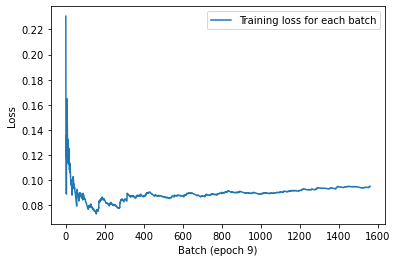

In [50]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### 텐서보드(TensorBoard) 활용

**텐서보드**(TensorBoard)는 모델 훈련과정을 모니터링하는 최고의 어플이며
텐서플로우와 함께 기본적으로 설치된다.

**주의사항**: 텐서보드 데이터의 저장경로를 

```python
/full_path_to_your_log_dir
```

대신에 

```python
./tensorboard_log_dir
```

등을 사용해야 리눅스, 맥 운영체제에서 오류가 발생하지 않는다.

In [52]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tensorboard_log_dir",
)

model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2950 - accuracy: 0.9128 - val_loss: 0.1475 - val_accuracy: 0.9591
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1677 - accuracy: 0.9528 - val_loss: 0.1224 - val_accuracy: 0.9668
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1395 - accuracy: 0.9621 - val_loss: 0.1158 - val_accuracy: 0.9697
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1285 - accuracy: 0.9675 - val_loss: 0.1157 - val_accuracy: 0.9712
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1192 - accuracy: 0.9708 - val_loss: 0.1141 - val_accuracy: 0.9722
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1145 - accuracy: 0.9724 - val_loss: 0.1039 - val_accuracy: 0.9766
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1059 - accuracy: 0.9740 - val_loss: 0.1045 - val_accuracy:

텐서보드를 주피터 노트북에서 아래처럼 실행할 수 있다.

In [53]:
%load_ext tensorboard
%tensorboard --logdir ./tensorboard_log_dir

텐서보드를 독립적으로 실행하여 훈련과정을 실시간으로 모니터링 하려면
아래 명령어를 터미널 창에서 실행하고 반환된 주소로 접속하면 된다.

```python
tensorboard --logdir ./full_path_to_your_log_dir
```

## 7.4 사용자 정의 훈련 알고리즘: `fit()` 메서드 대체

### Training versus inference

### Low-level usage of metrics

In [ ]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

In [ ]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [ ]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [ ]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [ ]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

**Writing a step-by-step evaluation loop**

In [ ]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Make it fast with `tf.function`

**Adding a `tf.function` decorator to our evaluation step function**

In [ ]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

### Leveraging `fit()` with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [ ]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

In [ ]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [ ]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)